In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
train_values_df = pd.read_csv('train_values.csv')
train_label_df = pd.read_csv('train_labels.csv')

print(train_values_df.shape)
print(train_label_df.shape)
train_values_df.head()

(500000, 22)
(500000, 2)


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [5]:
train_values_df['accepted'] = train_label_df['accepted']
train_values_df['loan_amount'].describe()

count    500000.000000
mean        221.753158
std         590.641648
min           1.000000
25%          93.000000
50%         162.000000
75%         266.000000
max      100878.000000
Name: loan_amount, dtype: float64

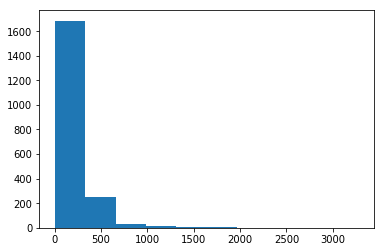

In [25]:
plt.hist(train_values_df['loan_amount'][0:2000])
plt.show()

# train_values_df['loan_amount'][0:1000].plot.hist(bins=12)

In [8]:
train_values_df['accepted'].describe()

count    500000.000000
mean          0.500228
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

In [10]:
eth4 = train_values_df[train_values_df['applicant_ethnicity'] == 4]
print(eth4['accepted'].mean())

eth2 = train_values_df[train_values_df['applicant_ethnicity'] == 2]
print(eth2['accepted'].mean())

0.789310878157759
0.520518778120556


In [11]:
app_sex1 = train_values_df[train_values_df['applicant_sex'] == 1]
print(app_sex1['accepted'].mean())

app_sex2 = train_values_df[train_values_df['applicant_sex'] == 2]
print(app_sex2['accepted'].mean())

0.520822910267696
0.46645342814748453


In [13]:
state45 = train_values_df[train_values_df['state_code'] == 45]

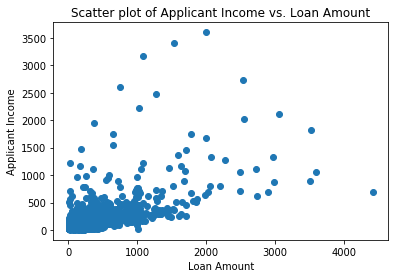

In [16]:
plt.scatter(state45['loan_amount'], state45['applicant_income'])
plt.title('Scatter plot of Applicant Income vs. Loan Amount') # Give the plot a main title
plt.xlabel('Loan Amount') # Set text for the x axis
plt.ylabel('Applicant Income')# Set text for y axis
plt.show()

In [20]:
state48 = train_values_df[train_values_df['state_code'] == 48]
# state48AndNotMissing = state48[state48['state_code'] != -1]

In [56]:
state48['county_code'].value_counts()
# state48AndNotMissing['county_code'].value_counts()

 83     1624
 232    1310
 45     1300
 274    1284
 251     908
 306     841
 321     836
 31      783
 137     469
 100     466
 79      406
 165     354
 246     351
 61      347
 123     292
 320     261
 56      247
 158     216
 47      186
 59      169
 129     167
 35      167
 180     160
 136     128
 14      120
 311     117
 133     113
 124     113
 248     110
 131     106
        ... 
 104      79
 3        76
 313      73
 72       73
 10       73
 156      69
 2        68
 203      68
 151      66
 299      65
 257      62
 275      61
 296      52
 122      51
 49       51
-1        50
 68       49
 20       48
 260      47
 210      42
 11       41
 103      39
 130      36
 288      35
 57       33
 134      33
 318      31
 41       27
 98       27
 111      12
Name: county_code, Length: 63, dtype: int64

In [57]:
# state48AndNotMissing['accepted'].mean()
# state48AndNotMissing[['state_code', 'county_code']].groupby('county_code').count()

for k in state48['county_code'].unique():
    if k != -1:
        ck = state48[state48['county_code'] == k]
        print('county_code: '+ ' ' + str(k))
        print(ck['accepted'].mean())
        print('\n')

county_code:  56
0.5668016194331984


county_code:  321
0.5741626794258373


county_code:  61
0.5504322766570605


county_code:  246
0.3732193732193732


county_code:  136
0.453125


county_code:  83
0.4753694581280788


county_code:  123
0.4623287671232877


county_code:  137
0.5671641791044776


county_code:  104
0.4430379746835443


county_code:  232
0.44122137404580153


county_code:  3
0.5131578947368421


county_code:  251
0.5374449339207048


county_code:  165
0.5338983050847458


county_code:  311
0.5982905982905983


county_code:  2
0.45588235294117646


county_code:  45
0.4107692307692308


county_code:  248
0.5


county_code:  274
0.5116822429906542


county_code:  313
0.4520547945205479


county_code:  55
0.5384615384615384


county_code:  11
0.3902439024390244


county_code:  129
0.4431137724550898


county_code:  299
0.36923076923076925


county_code:  180
0.51875


county_code:  59
0.4911242603550296


county_code:  31
0.5836526181353767


county_code:  306
0.44589774078

In [44]:
state2 = train_values_df[train_values_df['state_code'] == 2]
print(state2['accepted'].mean())

state4 = train_values_df[train_values_df['state_code'] == 4]
print(state4['accepted'].mean())

0.4567042972715248
0.5753616425571628


In [12]:
train_values_df.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [58]:
train_values_df.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [3]:
# from keras import Sequential
# from keras.layers import Dense

In [4]:
# from catboost import CatBoostRegressor

In [14]:
for col in train_values_df.columns:
    print(col, ': \n')
    print(train_values_df[col].describe())
    print('\n')

row_id : 

count    500000.000000
mean     249999.500000
std      144337.711634
min           0.000000
25%      124999.750000
50%      249999.500000
75%      374999.250000
max      499999.000000
Name: row_id, dtype: float64


loan_type : 

count    500000.000000
mean          1.366276
std           0.690555
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: loan_type, dtype: float64


property_type : 

count    500000.000000
mean          1.047650
std           0.231404
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: property_type, dtype: float64


loan_purpose : 

count    500000.000000
mean          2.066810
std           0.948371
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: loan_purpose, dtype: float64


occupancy : 

count    500000.000000
mean          1.109590
std 

In [16]:
preped_data2 = pd.read_csv('preped/preped_data2.csv')
print(preped_data2.shape)

(500000, 24)


In [29]:
for col in preped_data2.columns:
    print(col, ': \n')
    print(preped_data2[col].describe())
    print('\n')

Unnamed: 0 : 

count    500000.000000
mean     249999.500000
std      144337.711634
min           0.000000
25%      124999.750000
50%      249999.500000
75%      374999.250000
max      499999.000000
Name: Unnamed: 0, dtype: float64


row_id : 

count    500000.000000
mean     249999.500000
std      144337.711634
min           0.000000
25%      124999.750000
50%      249999.500000
75%      374999.250000
max      499999.000000
Name: row_id, dtype: float64


loan_type : 

count    500000.000000
mean          1.366276
std           0.690555
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: loan_type, dtype: float64


property_type : 

count    500000.000000
mean          1.047650
std           0.231404
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: property_type, dtype: float64


loan_purpose : 

count    500000.000000
mean          2.066810
std  

In [28]:
for col in train_values_df.columns:
    print(col, ': \n')
    print(len(train_values_df[col].unique()))
    print('\n')

row_id : 

500000


loan_type : 

4


property_type : 

3


loan_purpose : 

3


occupancy : 

3


loan_amount : 

2997


preapproval : 

3


msa_md : 

409


state_code : 

53


county_code : 

318


applicant_ethnicity : 

4


applicant_race : 

7


applicant_sex : 

4


applicant_income : 

1898


population : 

18203


minority_population_pct : 

91924


ffiecmedian_family_income : 

68869


tract_to_msa_md_income_pct : 

54536


number_of_owner-occupied_units : 

6089


number_of_1_to_4_family_units : 

7375


lender : 

6111


co_applicant : 

2


accepted : 

2




In [30]:
for col in ['msa_md', 'state_code', 'county_code']:
    print(col, ': \n')
    print(len(preped_data2[col].unique()))
    print('\n')

msa_md : 

408


state_code : 

52


county_code : 

317


